## Timeseries manipulation

In [1]:
import lenapy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

Open the global mean sea level time series

In [2]:
gmsl=xr.open_dataset('../../data/MSL.nc',engine='lenapyNetcdf')
data=gmsl.msl    

/home/rguillaume/virtual_envs/phd/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.16.0
  warnings.warn(


Perform climatology analysis

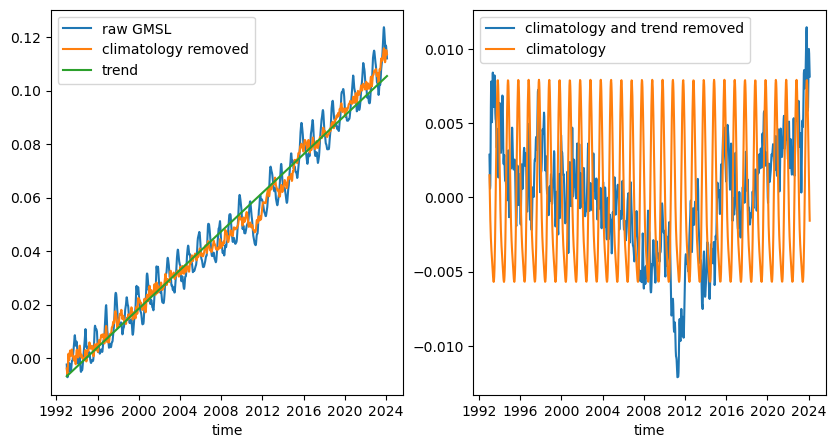

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

data.plot(ax=ax1,label='raw GMSL')
data.lntime.climato().plot(ax=ax1,label='climatology removed')
data.lntime.climato(signal=False).plot(ax=ax1,label='trend')

data.lntime.climato(mean=False,trend=False).plot(ax=ax2,label='climatology and trend removed')
data.lntime.climato(mean=False,trend=False,signal=False,cycle=True).plot(ax=ax2,label='climatology')
ax1.legend()
ax2.legend()

Filtering

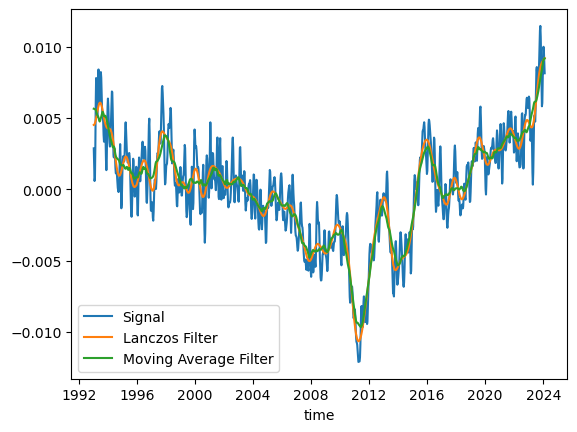

In [4]:
signal=data.lntime.climato(mean=False,trend=False)
signal.plot(label='Signal')
signal.lntime.filter(filter_name='lanczos',cutoff=36,order=2).plot(label='Lanczos Filter')
signal.lntime.filter(filter_name='moving_average',cutoff=36).plot(label='Moving Average Filter')
plt.legend()

Compute the trend in m/year

In [5]:
print("Trend : %7.5f m/y"%data.lntime.trend(time_unit='365D'))

Trend : 0.00362 m/y


Plots the derivative of the mean sea level, filtered at 5 years, with two derivative formulas and two different filters

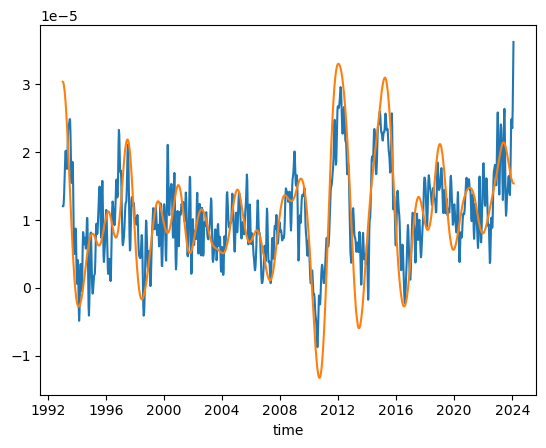

In [6]:
data.lntime.climato().lntime.diff_2pts('time',time_unit='1D').lntime.filter('moving_average',cutoff=60,).plot()
data.lntime.climato().lntime.diff_3pts('time',time_unit='1D').lntime.filter('lanczos',cutoff=60,order=2).plot()